# Instalaciones

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from datetime import datetime
# from google.colab import files

from wordcloud import WordCloud  # Para crear las nubes de palabras
import spacy  # Para análisis de texto
import squarify  # Para diagramas de árbol

spacy.cli.download('es_core_news_sm')  # Para instalar el modelo de Spacy y hacer análisis de texto en español
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn. El tema por defecto es 'darkgrid'

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


# Carga de datos

In [3]:
formalizados = pd.read_csv('formalizados.csv')

formalizados = formalizados.drop(columns="Unnamed: 0")

for i in formalizados.columns:
  if formalizados[i].dtypes == object:
    formalizados[i] = formalizados[i].astype('string')

formalizados['Fecha Formalización Contrato']= pd.to_datetime(formalizados['Fecha Formalización Contrato'], errors='coerce')

# print(formalizados.dtypes)

In [4]:
modificados = pd.read_csv('modificados.csv')

modificados = modificados.drop(columns="Unnamed: 0")

# for i in modificados.columns:
#   if modificados[i].dtypes == object:
#     modificados[i] = modificados[i].astype('string')

columnasDate = ['Fecha Aprobación', 'Fecha Inicio']
for col in columnasDate:
  modificados[col]= pd.to_datetime(modificados[col], errors='coerce')

# print(modificados.dtypes)

In [5]:
prorrogados = pd.read_csv('prorrogados.csv')

prorrogados = prorrogados.drop(columns="Unnamed: 0")

# for i in prorrogados.columns:
#   if prorrogados[i].dtypes == object:
#     prorrogados[i] = prorrogados[i].astype('string')

columnasDate = ['Fecha Aprobación', 'Fecha Inicio', 'Fecha Fin Prórroga']
for col in columnasDate:
  prorrogados[col]= pd.to_datetime(prorrogados[col], errors='coerce')

# print(prorrogados.dtypes)

In [6]:
renunciados = pd.read_csv('renunciados.csv')

renunciados = renunciados.drop(columns="Unnamed: 0")

# for i in renunciados.columns:
#   if renunciados[i].dtypes == object:
#     renunciados[i] = renunciados[i].astype('string')

# print(renunciados.dtypes)

# Num. Exp

In [ ]:
duplicados = formalizados.duplicated(subset=['Num. Exp'])

num_elementos = len(formalizados)
num_duplicados = duplicados.sum()

print(num_elementos)
print(num_duplicados)

porcentaje_duplicados = num_duplicados/num_elementos

print(porcentaje_duplicados)


889
287
0.3228346456692913


# Objeto Contrato

In [7]:
df_objeto = formalizados[formalizados['Objeto Contrato'].notnull()]

organismos = df_objeto['Objeto Contrato'].values
# print(organismos)

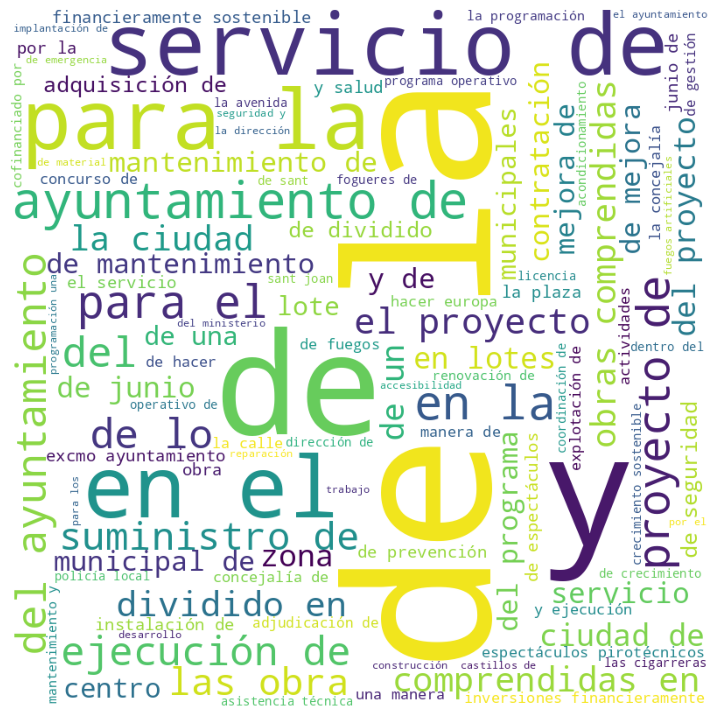

In [9]:
# Nube de palabras

nlp = spacy.load("es_core_news_sm")

list_words = [x.split() for x in df_objeto['Objeto Contrato'].values]  # Obtenemos todas las palabras individuales para cada nombre

list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

corpus = corpus.replace('alicante ', '')
corpus = corpus.replace(' de  ', '')
corpus = corpus.replace(' la  ', '')

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# lista_palabras = pd.Series(df_objeto['Objeto Contrato'].values)
# lista_palabras.describe()

# Organismo

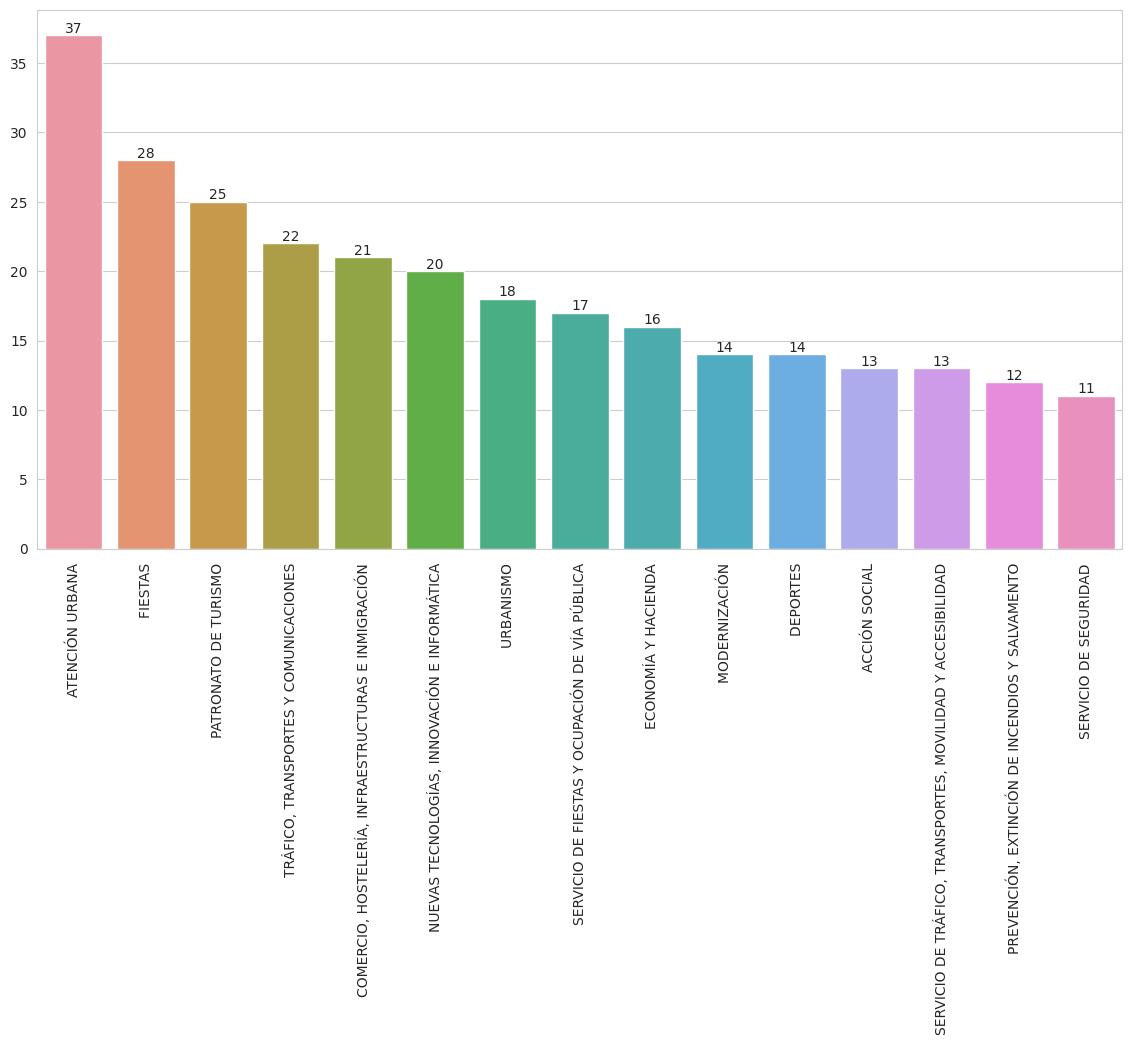

In [26]:
# ¿Y qué organismo ha publicado más contratos?
# Usamos 'barplot' en lugar de 'countplot' porque en 'organismo_counts' ya tenemos la cuenta hecha

df_organismo = formalizados[formalizados['Organismo'] != ('Ordinario')]
df_organismo = df_organismo[df_organismo['Organismo'].notnull()]
# df_organismo = formalizados

organismo_counts = df_organismo['Organismo'].value_counts()[:15]  # Nos quedamos con los quince primeros

plt.figure(figsize=(14,7))
ax =sns.barplot(x=organismo_counts.index, y=organismo_counts.values)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)  # Rotamos las etiquetas para que no se solapen
plt.show()

Organismo
COMERCIO, HOSTELERÍA, INFRAESTRUCTURAS E INMIG...    23231138.01
ATENCIÓN URBANA                                      20186156.09
MEDIO AMBIENTE, LIMPIEZA, RESIDUOS, ZONAS VERD...    17411239.78
URBANISMO                                            11213567.74
PATRONATO DE TURISMO                                  3796654.87
TRÁFICO, TRANSPORTES Y COMUNICACIONES                 3277421.76
SERVICIO DE SEGURIDAD                                 3227022.02
ECONOMÍA Y HACIENDA                                   3004203.68
INFRAESTRUCTURAS, MANTENIMIENTO, PLAZA DE TORO...     2632999.24
SERVICIO DE TRÁFICO, TRANSPORTES, MOVILIDAD Y ...     2141162.86
PREVENCIÓN, EXTINCIÓN DE INCENDIOS Y SALVAMENTO       1947084.98
PATRONATO DE LA VIVIENDA                              1778774.52
MODERNIZACIÓN                                         1174735.54
DEPORTES                                              1084837.71
ACCIÓN SOCIAL                                         1061921.40
NUEVAS TECNOLOG

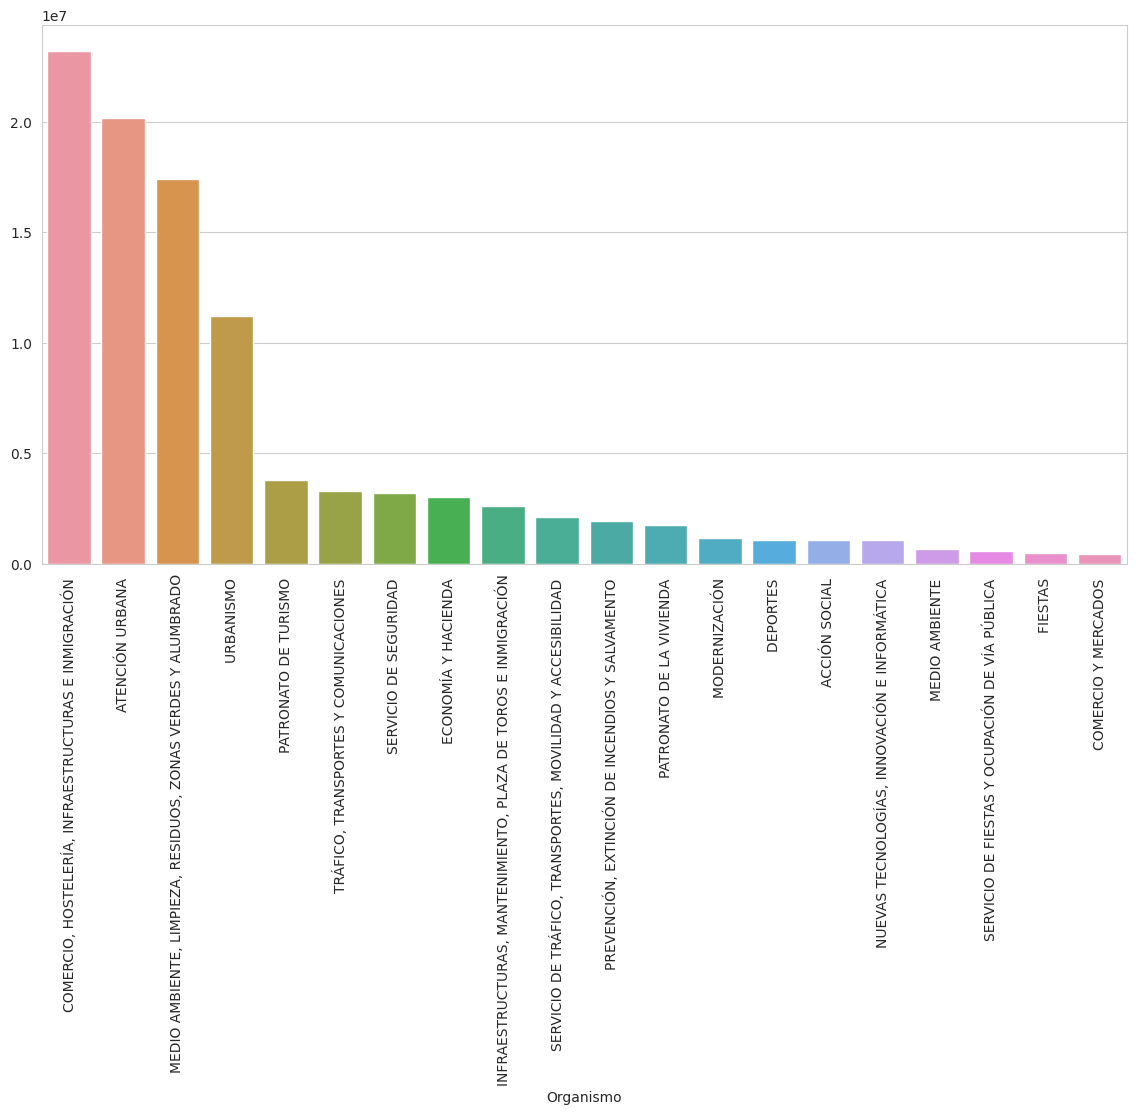

In [27]:
# ¿Y qué organismo ha gastado más dinero?

df_organismo = df_organismo[df_organismo['Organismo'] != ('Urgente')]
df_organismo = df_organismo[df_organismo['Organismo'] != ('Emergencia')]

organismo_sum = df_organismo.groupby(by=['Organismo'])['Importe total Adjudicación'].sum()  # Agrupamos importes por organismo
organismo_sum = organismo_sum.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20


print(organismo_sum)

plt.figure(figsize=(14, 7))
sns.barplot(x=organismo_sum.index, y=organismo_sum.values)
plt.xticks(rotation=90)
plt.show()

Organismo
MEDIO AMBIENTE, LIMPIEZA, RESIDUOS, ZONAS VERD...    2.487320e+06
COMERCIO, HOSTELERÍA, INFRAESTRUCTURAS E INMIG...    1.222691e+06
MEDIO AMBIENTE                                       6.862045e+05
URBANISMO                                            6.229760e+05
ATENCIÓN URBANA                                      5.767473e+05
INFRAESTRUCTURAS, MANTENIMIENTO, PLAZA DE TORO...    4.388332e+05
SERVICIO DE SEGURIDAD                                3.227022e+05
PATRONATO DE LA VIVIENDA                             2.964624e+05
ECONOMÍA Y HACIENDA                                  2.002802e+05
SERVICIO DE RECURSOS HUMANOS, ORGANIZACIÓN Y C...    1.972830e+05
PATRONATO DE TURISMO                                 1.807931e+05
SERVICIO DE TRÁFICO, TRANSPORTES, MOVILIDAD Y ...    1.784302e+05
EDUCACIÓN                                            1.735965e+05
COORDINACIÓN DE PROYECTOS                            1.682323e+05
SERVICIO DE PREVENCIÓN DE RIESGOS LABORALES          1.679238e+05


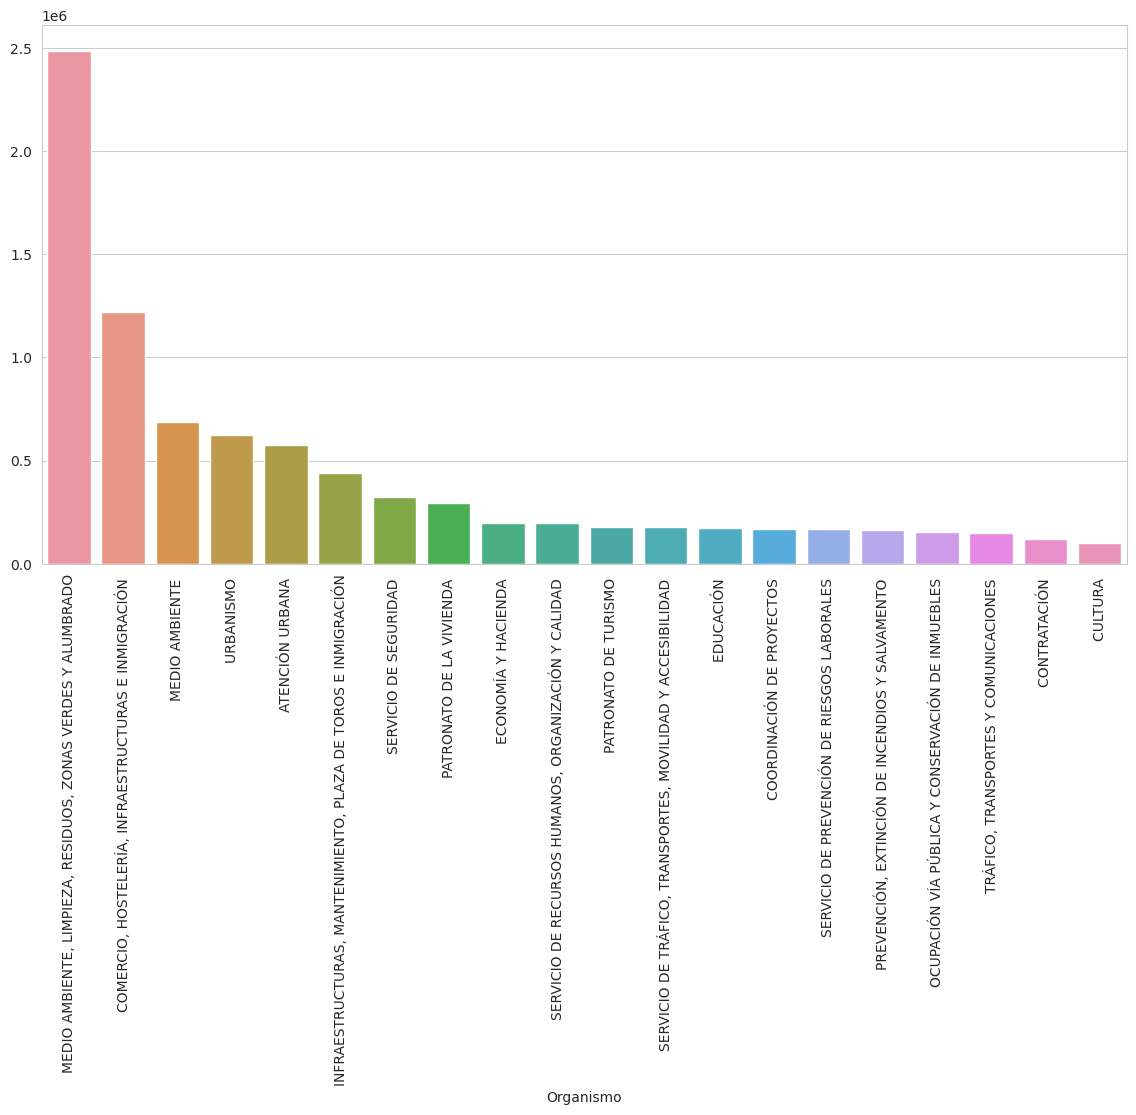

In [25]:
# ¿Y qué organismo gasta más dinero de media?

df_organismo = df_organismo[df_organismo['Organismo'] != ('Urgente')]
df_organismo = df_organismo[df_organismo['Organismo'] != ('Emergencia')]

organismo_mean = df_organismo.groupby(by=['Organismo'])['Importe total Adjudicación'].mean() # Agrupamos importes por organismo
organismo_mean = organismo_mean.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20


print(organismo_mean)

plt.figure(figsize=(14, 7))
sns.barplot(x=organismo_mean.index, y=organismo_mean.values)
plt.xticks(rotation=90)
plt.show()

# Tipo Tramitación
 ¿hacer gráfico circular?

In [ ]:
# Otro ejemplo: ¿qué tipo de tramitación tiene más contratos formalizados en este ranking?

df_tramitacion = formalizados[formalizados['Tipo Tramitación'].notnull()]


for i in range(len(df_tramitacion)):
  if df_tramitacion.iloc[i]['Tipo Tramitación'].find('\n'):
    df_tramitacion.at[i,'Tipo Tramitación'] = df_tramitacion.iloc[i]['Tipo Tramitación'].replace('\n','')

df_tramitacion['Tipo Tramitación'] = df_tramitacion['Tipo Tramitación'].str.replace('Ordinario','Ordinaria')

# Al buscar '\n' se han añadida todas las filas que se habían descartado en la primera instrucción de esta celda
# por lo que lo volvemos a hacer con otra columna ya que son todas nulas en esas filas
df_tramitacion = df_tramitacion[df_tramitacion['Num. Exp'].notnull()]


plt.figure(figsize=(14,7))
ax = sns.countplot(x='Tipo Tramitación', data=df_tramitacion, order=df_tramitacion['Tipo Tramitación'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# Otro ejemplo: ¿qué tipo de tramitación tiene más contratos formalizados en este ranking?

datos = df_tramitacion['Tipo Tramitación'].value_counts()
etiquetas = df_tramitacion['Tipo Tramitación'].value_counts().index.tolist()
# print(datos)
# print(etiquetas)

tabla1 = pd.DataFrame(datos)

display(tabla1)

plt.figure(figsize=(14,7))
plt.pie(x=datos, labels=etiquetas, autopct='%1.1f%%')
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.01, 1.01), loc=2)  # Para sacar la leyenda fuera del gráfico
plt.show()

# Tipo de Contrato

¿hacer gráfico circular?

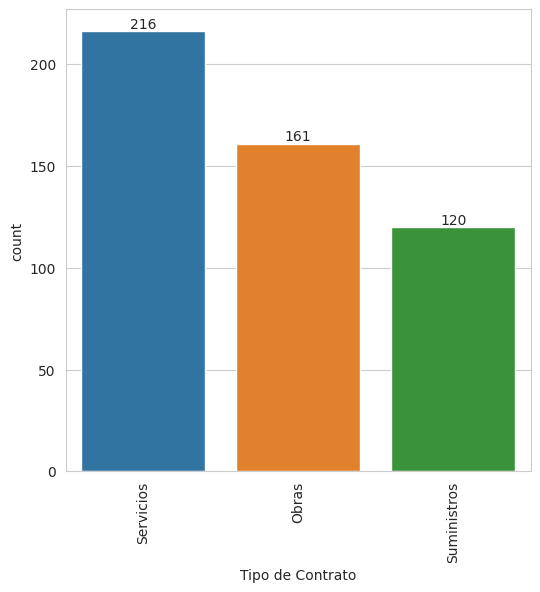

In [12]:
# Otro ejemplo: ¿qué tipo de contrato tiene más contratos formalizados en este ranking?

df_tipo_contrato = formalizados[formalizados['Tipo de Contrato'].notnull()]

plt.figure(figsize=(6,6))
ax =sns.countplot(x='Tipo de Contrato', data=df_tipo_contrato, order=df_tipo_contrato['Tipo de Contrato'].value_counts().index[:3])
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

[4.43246300e+09 2.35332089e+09 1.18500380e+09 7.47290540e+08
 6.97476085e+08 3.15693704e+08 4.09144480e+07]


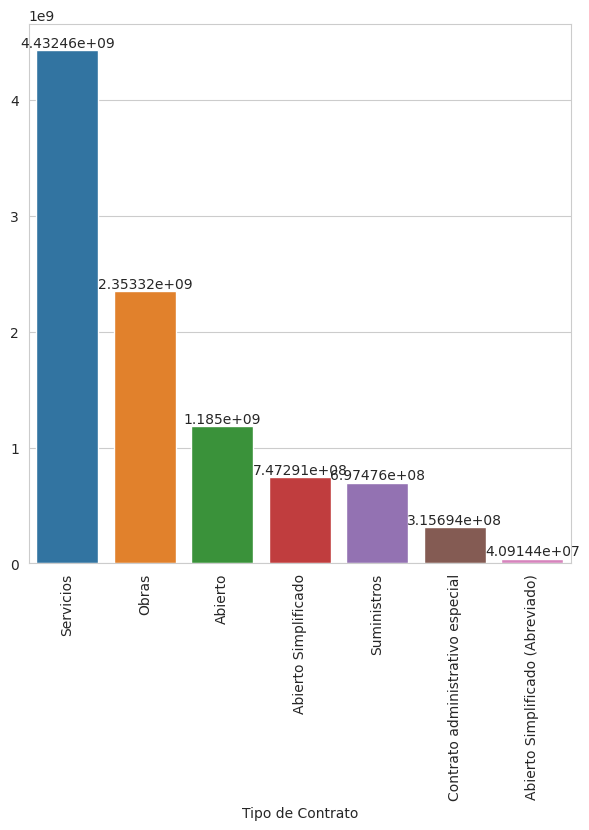

In [14]:
# ¿Y qué tipo de contrato ha gastado más dinero?

# df_organismo = df_organismo[df_organismo['Tipo de Contrato'] != ('Urgente')]
# df_organismo = df_organismo[df_organismo['Tipo de Contrato'] != ('Emergencia')]

tipo_contrato_sum = df_tipo_contrato.groupby(by=['Tipo de Contrato'])['Importe total Adjudicación'].sum()  # Agrupamos importes por tipo de contrato
tipo_contrato_sum = tipo_contrato_sum.sort_values(ascending=False)[:7]  # Nos quedamos con el Top 20


print(tipo_contrato_sum.values)

plt.figure(figsize=(7, 7))
ax = sns.barplot(x=tipo_contrato_sum.index, y=tipo_contrato_sum.values)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Procedimiento de Contratación

In [ ]:
# Otro ejemplo: ¿qué procedimiento de contratación tiene más contratos formalizados en este ranking?

plt.figure(figsize=(14,7))
sns.countplot(x='Procedimiento de Contratación', data=formalizados, order=formalizados['Procedimiento de Contratación'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

# Razón Social Adjudicatario

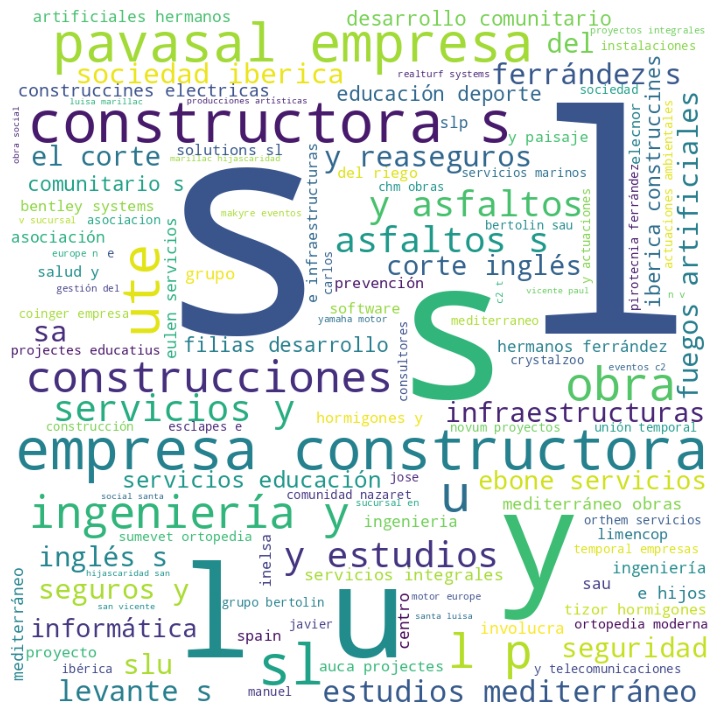

In [20]:
nlp = spacy.load("es_core_news_sm")

col = 'Razón Social Adjudicatario/Contratista'
df_razon = formalizados[formalizados[col].notnull()]

list_words = [x.split() for x in df_razon[col].values]  # Obtenemos todas las palabras individuales para cada nombre
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto

# list_words.replace("empresa",'')

# print(list_words)

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

# print(corpus)
corpus = corpus.replace('de ', '')
corpus = corpus.replace(' la ', '')
corpus = corpus.replace('alicante', '')
corpus = corpus.replace('españa', '')


wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Razón Social Adjudicatario/Contratista
UTE NETIAL                                           3.233522e+10
STV GESTION, S.L.                                    5.748471e+09
Subus Grupo de Transporte, S.L.                      9.870535e+08
PAVASAL EMPRESA CONSTRUCTORA, S.A.                   8.991315e+08
SOCIEDAD IBERICA DE CONSTRUCCINES ELECTRICAS, ...    8.296745e+08
UTE TRAFICO ALICANTE                                 8.058477e+08
SACYR SOCIAL, S.L.                                   7.870868e+08
GRUPO BERTOLIN, SAU                                  6.056744e+08
CHM, OBRAS E INFRAESTRUCTURAS S.A.                   5.589758e+08
UTE ABALA - API ALICANTE                             4.163050e+08
ACEINSA LEVANTE, S.A.                                3.931409e+08
FUNDACIÓN SALUD Y COMUNIDAD                          3.765778e+08
DOALCO, S.A.                                         3.239348e+08
ESCLAPES E HIJOS,S.L.                                3.089788e+08
ECISA COMPAÑIA GENERAL DE CONSTRUCCIO

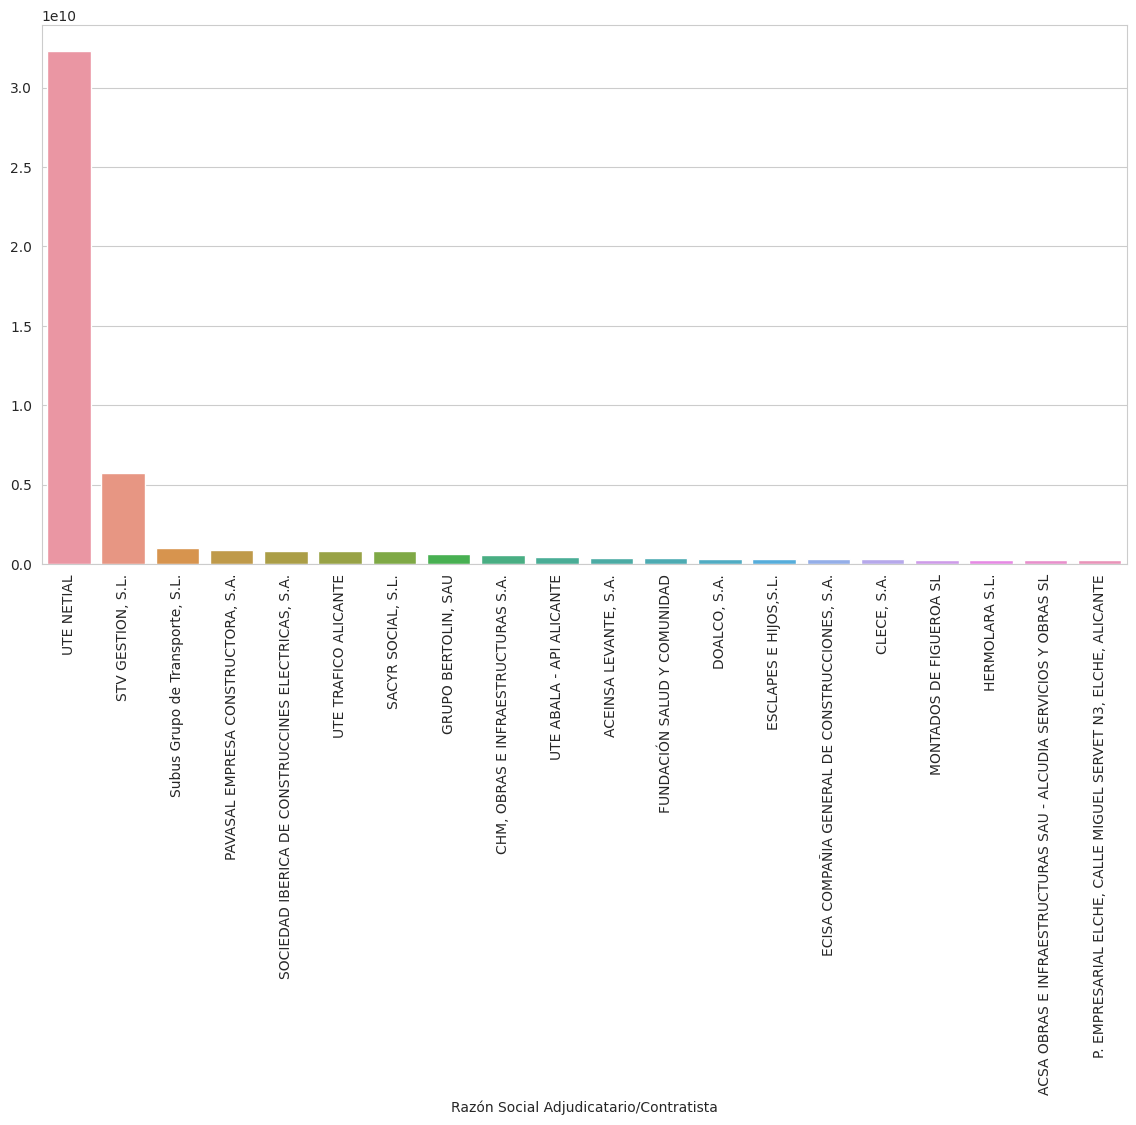

In [28]:
df_razon = df_razon[df_razon[col] != ('-')]

razon_sum = df_razon.groupby(by=[col])['Importe total Adjudicación'].sum()  # Agrupamos importes por razon social
razon_sum = razon_sum.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20


print(razon_sum)

plt.figure(figsize=(14, 7))
sns.barplot(x=razon_sum.index, y=razon_sum.values)
plt.xticks(rotation=90)
plt.show()

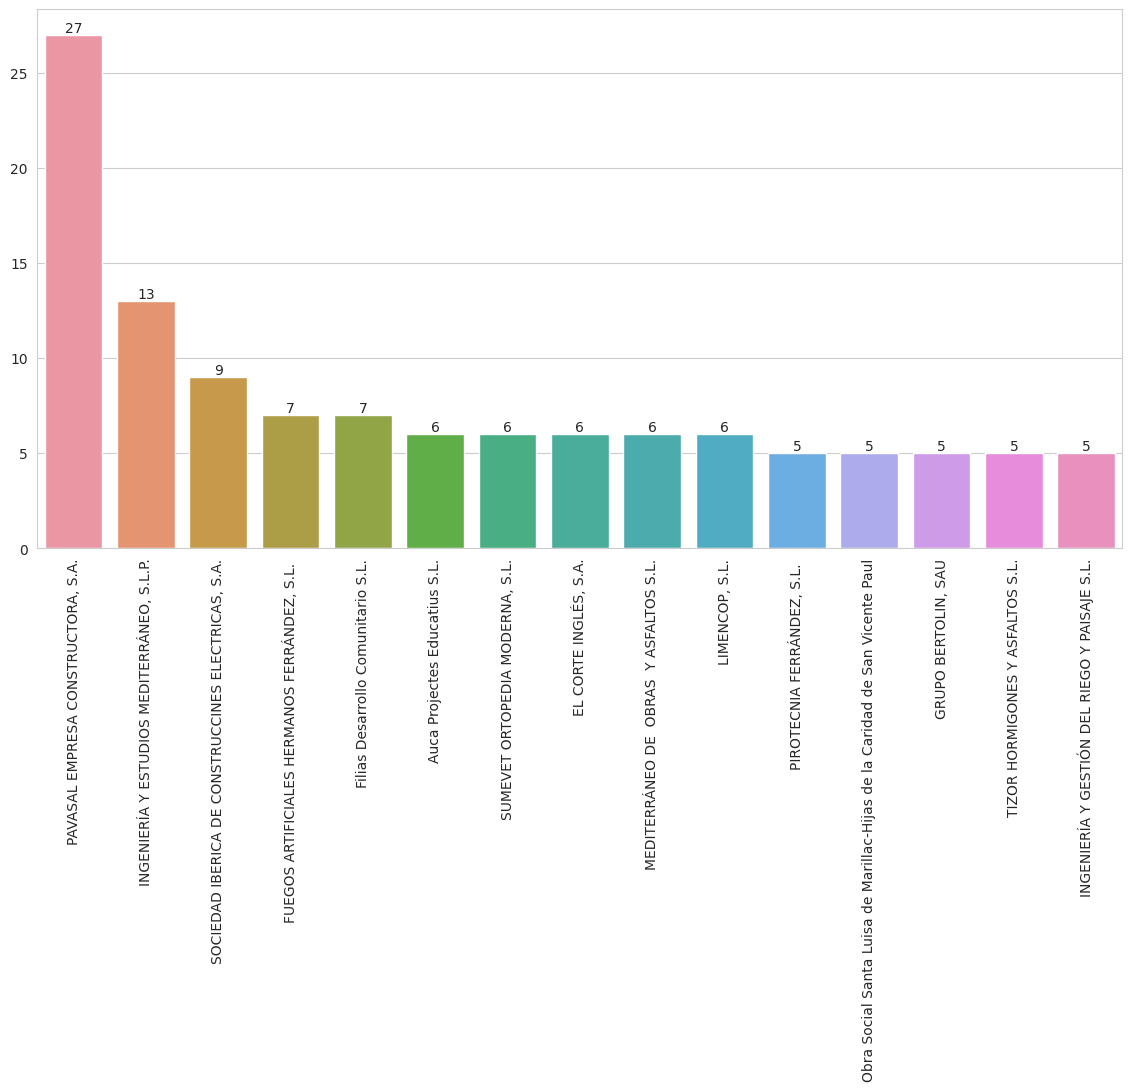

In [22]:
razon_counts = df_razon[col].value_counts()[:15]  # Nos quedamos con los quince primeros

plt.figure(figsize=(14,7))
ax =sns.barplot(x=razon_counts.index, y=razon_counts.values)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)  # Rotamos las etiquetas para que no se solapen
plt.show()

# Importe total Adjudicación

# Año

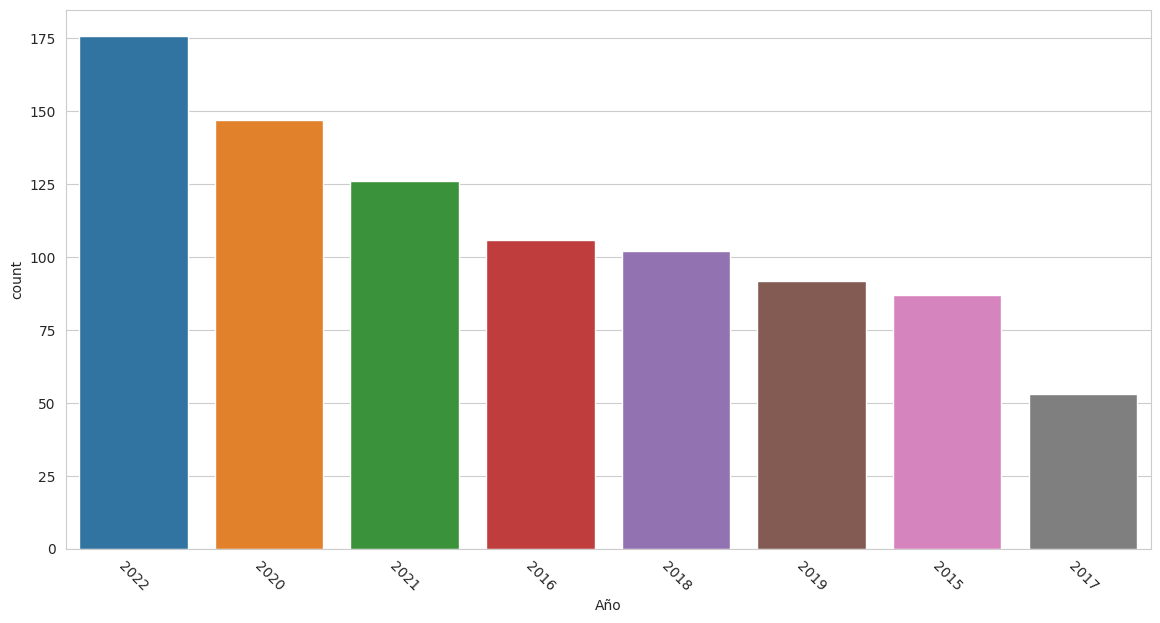

In [ ]:
# ¿Qué año se formalizaron más contratos?
# Se puede considerar 'Año' como un valor discreto, por lo que un diagrama de barras es adecuado

plt.figure(figsize=(14,7))
sns.countplot(x='Año', data=formalizados, order = formalizados['Año'].value_counts().index)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

In [ ]:
# ¿Qué año se modificaron más contratos?
# Se puede considerar 'Año' como un valor discreto, por lo que un diagrama de barras es adecuado

plt.figure(figsize=(14,7))
sns.countplot(x='Año', data=modificados, order = modificados['Año'].value_counts().index)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

In [ ]:
# ¿Qué año se prorrogaron más contratos?
# Se puede considerar 'Año' como un valor discreto, por lo que un diagrama de barras es adecuado

plt.figure(figsize=(14,7))
sns.countplot(x='Año', data=prorrogados, order = prorrogados['Año'].value_counts().index)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

In [ ]:
# ¿Qué año se renunciaron más contratos?
# Se puede considerar 'Año' como un valor discreto, por lo que un diagrama de barras es adecuado

plt.figure(figsize=(14,7))
sns.countplot(x='Año', data=renunciados, order = renunciados['Año'].value_counts().index)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

# Pruebas

## Cronograma

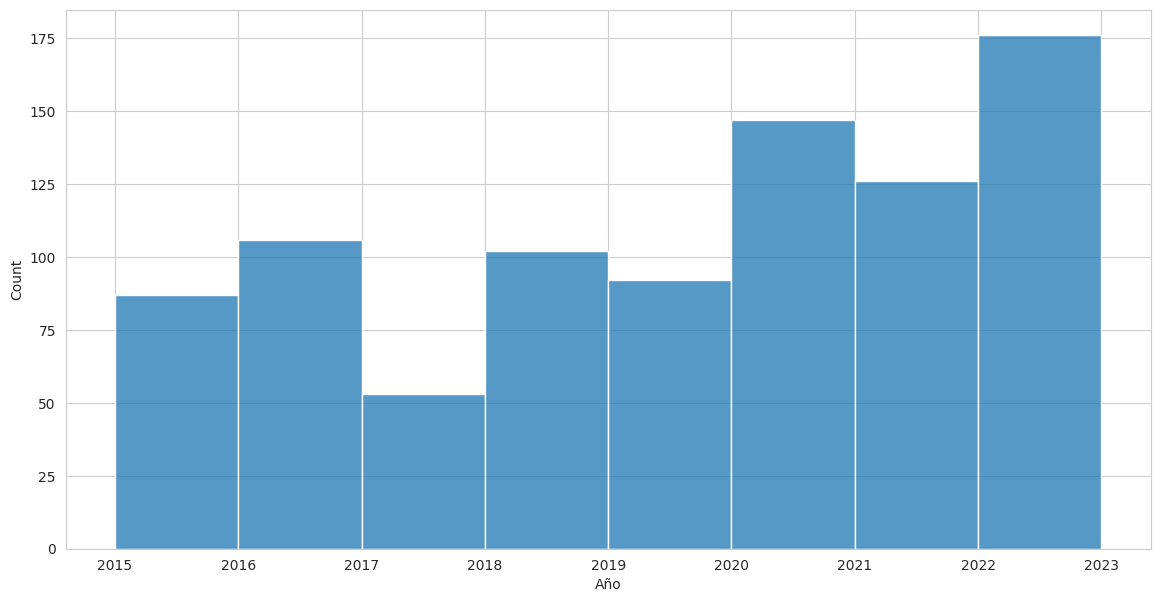

In [ ]:
plt.figure(figsize=(14,7))  # Fijamos el tamaño de la figura con Matplotlib
sns.histplot(x='Año', data=formalizados, bins=[x for x in range(2015,2024)])
plt.show()

# plt.figure(figsize=(14,7))
# sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)])
# plt.show()